In [1]:
#Importing library to read the dataset 
import pandas as pd
train = pd.read_csv('train_news.csv')

In [2]:
#printing first five rows
train.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [3]:
#Checking the null values
train.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [4]:
# Firstly, fill all the null spaces with a space
train = train.fillna(' ')
train['total'] = train['headline'] + ' ' + train['written_by'] + ' ' + train['news']

In [5]:
# Rechecking null values
train.isnull().sum()

Unnamed: 0    0
id            0
headline      0
written_by    0
news          0
label         0
total         0
dtype: int64

In [6]:
#Pre-processing/ Cleaning the Data
#For preprocessing the data, we will need some libraries.
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
nltk.corpus.stopwords
nltk.corpus.util.LazyCorpusLoader

nltk.corpus.util.LazyCorpusLoader

Stopwords: Stop words are those common words that appear in a text many times and do not contribute to machine’s understanding of the text.
We don’t want these words to appear in our data. So, we remove these words.

Tokenization: Word tokenization is the process of splitting a large sample of text into words.


Lemmatization: Lemmatization is the process of grouping together the different inflected forms of same root word so they can be analysed as a single item.

In [7]:
# Convert all messages to lower case
train['total'] = train['total'].str.lower()

In [8]:
train.head()

,Unnamed: 0,id,headline,written_by,news,label,total
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,ethics questions dogged agriculture nominee as...
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,u.s. must dig deep to stop argentina’s lionel ...
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,cotton to house: ’do not walk the plank and vo...
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"paul lepage, besieged maine governor, sends co..."
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,a digital 9/11 if trump wins finian cunningham...


In [9]:
for index, row in train.iterrows():
    filter_sentence = ''
    sentence = row['total']
    
   

In [10]:
# Cleaning the sentence with regex
sentence = re.sub(r'[^\w\s]', '', sentence)

In [11]:
# Tokenization
words = nltk.word_tokenize(sentence)

In [12]:
nltk.corpus.util.LazyCorpusLoader
stopwords.words('english')
# Stopwords removal
#words = [w for w in words if not w in stopwords]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

train['total'] = train['total'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [14]:
train.head()

,Unnamed: 0,id,headline,written_by,news,label,total
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,ethics questions dogged agriculture nominee ge...
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,u.s. must dig deep stop argentina’s lionel mes...
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,cotton house: ’do walk plank vote bill cannot ...
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"paul lepage, besieged maine governor, sends co..."
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,digital 9/11 trump wins finian cunningham fini...


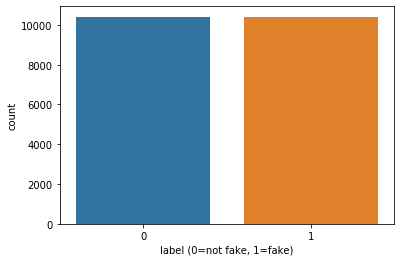

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label',data=train)
plt.xlabel('label (0=not fake, 1=fake)')
plt.show()


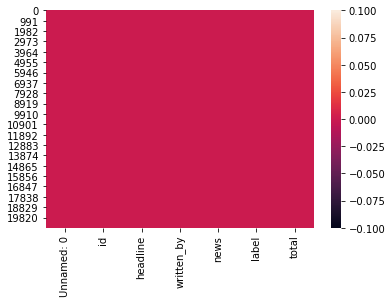

In [16]:
sns.heatmap(train.isnull())

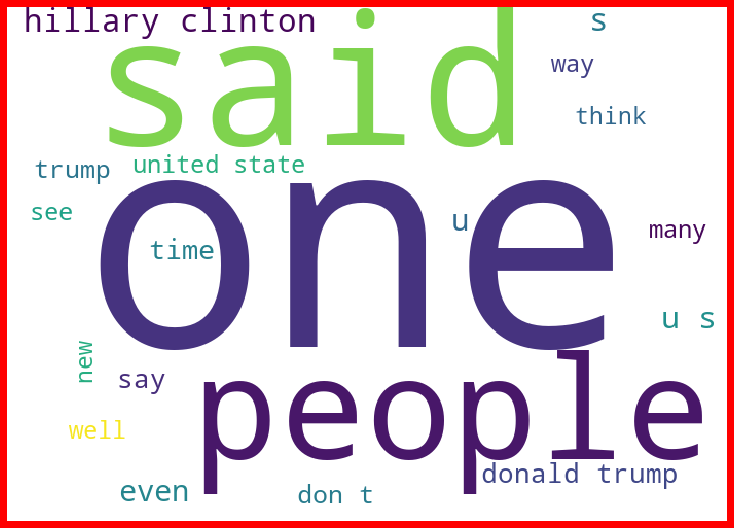

In [17]:
#Getting sense of loud words in Fake 
from wordcloud import WordCloud


fake = train['total'][train['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

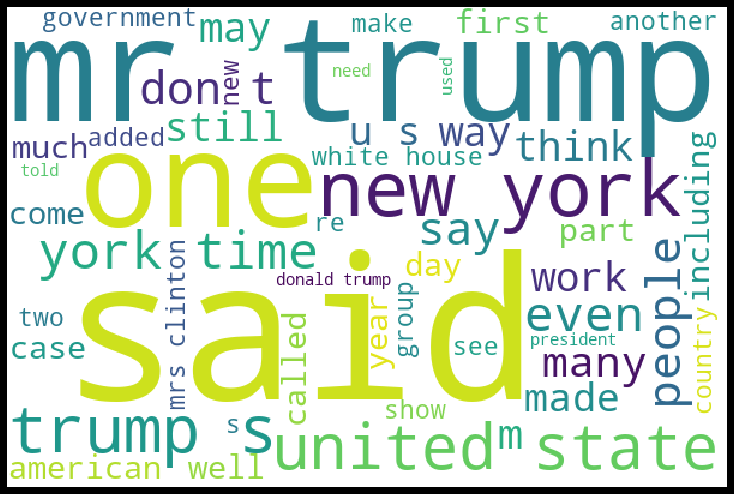

In [18]:
#Getting sense of loud words in Real 

real= train['total'][train['label']==0]
real_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(real))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(real_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
X_train = train['total']
Y_train = train['label']

Count Vectorizer
In order to use textual data for predictive modelling, the text must be parsed to remove certain words — this process is called tokenization. These words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature extraction (or vectorization).

TF-IDF Vectorizer
TF-IDF stands for Term Frequency — Inverse Document Frequency. It is one of the most important techniques used for information retrieval to represent how important a specific word or phrase is to a given document.

In [20]:
# Importing Libraries
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [22]:
# Importing library for train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix,Y_train, random_state=0)

In [23]:
#We will implement three models here and compare their performance.

In [24]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Accuracy = logreg.score(X_test, y_test)

In [25]:
Accuracy

0.9615384615384616

In [26]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)
Accuracy = NB.score(X_test, y_test)

In [27]:
Accuracy

0.8803846153846154

In [28]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
Accuracy = clf.score(X_test, y_test)

In [29]:
Accuracy

0.9634615384615385

In [30]:
# KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, y_train)
Accuracy = KNN.score(X_test, y_test)

In [31]:
Accuracy

0.8509615384615384

In [32]:
#The best is performing Logistic Regression with the accuracy score 96%